In [101]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [102]:
# Add data to geopandas df
# Make sure you download the files included in this folder in order to use this code
h_data = gpd.read_file('houston_housing/acs2020_5yr_B25003_14000US48201553401.geojson')
i_data = gpd.read_file('houston_income/acs2020_5yr_B19001_14000US48201553401.geojson')


In [103]:
# Check that data was imported properly
i_data.head()


,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,14000US48157670101,"Census Tract 6701.01, Fort Bend, TX",1768.0,218.0,74.0,59.0,50.0,56.0,73.0,66.0,...,123.0,142.0,81.0,30.0,29.0,75.0,49.0,15.0,17.0,"MULTIPOLYGON (((-95.46828 29.59301, -95.46756 ..."
1,14000US48157670102,"Census Tract 6701.02, Fort Bend, TX",1026.0,139.0,28.0,38.0,56.0,67.0,26.0,24.0,...,55.0,102.0,63.0,27.0,24.0,0.0,14.0,11.0,18.0,"MULTIPOLYGON (((-95.47123 29.58615, -95.47120 ..."
2,14000US48157670201,"Census Tract 6702.01, Fort Bend, TX",500.0,49.0,0.0,14.0,0.0,14.0,0.0,14.0,...,100.0,194.0,154.0,0.0,14.0,0.0,14.0,0.0,14.0,"MULTIPOLYGON (((-95.48406 29.59032, -95.48309 ..."
3,14000US48157670202,"Census Tract 6702.02, Fort Bend, TX",1966.0,346.0,72.0,78.0,84.0,77.0,31.0,35.0,...,206.0,180.0,107.0,117.0,120.0,0.0,20.0,47.0,55.0,"MULTIPOLYGON (((-95.48472 29.60789, -95.48470 ..."
4,14000US48157670300,"Census Tract 6703, Fort Bend, TX",1134.0,170.0,65.0,54.0,29.0,27.0,82.0,47.0,...,81.0,75.0,56.0,121.0,129.0,47.0,50.0,8.0,13.0,"MULTIPOLYGON (((-95.49424 29.60700, -95.49375 ..."


In [104]:
# Make sure there are the same number of census tracts in both
print('Housing shape: ', h_data.shape)
print('Income shape:', i_data.shape)

Housing shape:  (1068, 9)
Income shape: (1068, 37)


In [105]:
list(i_data)
list(h_data)

['geoid',
 'name',
 'B25003001',
 'B25003001, Error',
 'B25003002',
 'B25003002, Error',
 'B25003003',
 'B25003003, Error',
 'geometry']

In [106]:
# Columns to keep for each data set
income_col = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

housing_col = ['geoid',
 'name',
 'B25003001',
 'B25003002',
 'B25003003',
 'geometry']

In [107]:
#  Assign those new cols to each set
i_data = i_data[income_col]
i_data.columns = ['geoid',
    'name',
    'Total:',
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $19,999',
    '$20,000 to $24,999',
    '$25,000 to $29,999',
    '$30,000 to $34,999',
    '$35,000 to $39,999',
    '$40,000 to $44,999',
    '$45,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more',
    'geometry']

In [108]:
# Housing data column name change
h_data = h_data[housing_col]
h_data.columns = ['geoid',
    'name',
    'Total',
    'Owner occupied',
    'Renter occupied',
    'geometry']

<AxesSubplot:>

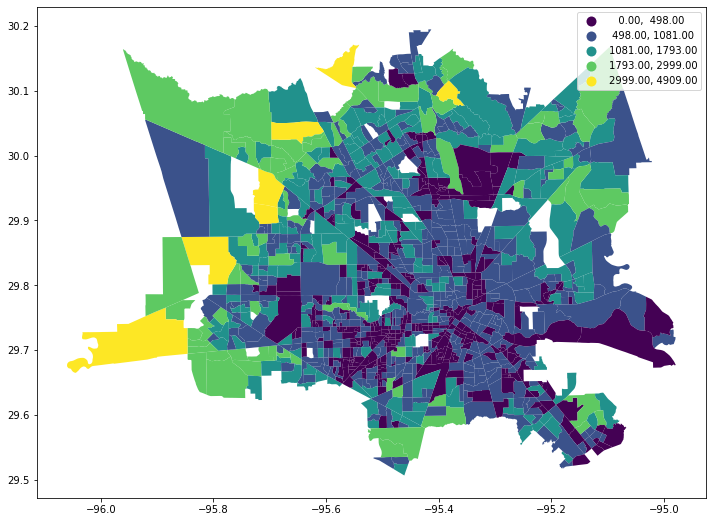

In [109]:
h_data.plot(figsize=(12,10), column ='Owner occupied', legend = True, scheme = 'NaturalBreaks')

<AxesSubplot:>

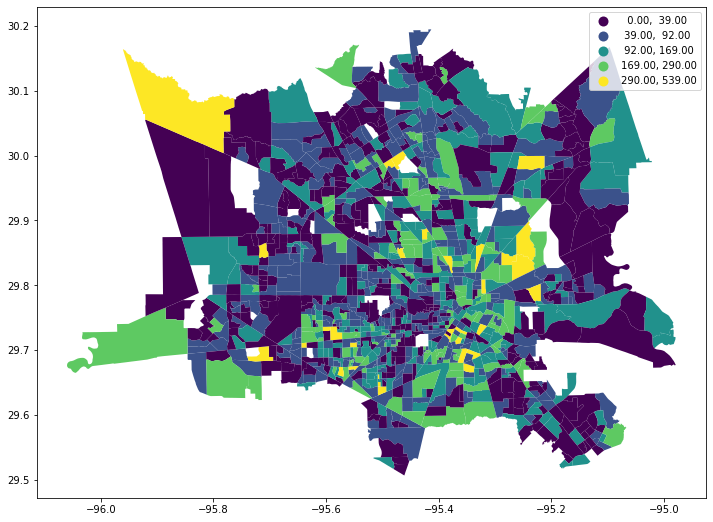

In [110]:
i_data.plot(figsize=(12,10), column ='Less than $10,000', legend = True, scheme = 'NaturalBreaks')